<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/Football_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
 df= pd.read_csv("EPL_20_21.csv")

In [14]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [16]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [17]:
# number of null values 
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [19]:
#adding min/match

df['mins/match']=(df['Mins']/df['Matches']).astype(int)

In [21]:
#adding goal/match
df['goal/match']=(df['Goals']/df['Matches']).astype(int)

In [26]:
#total goals and total penalty goals
total_goal= df['Goals'].sum()
penalty_goal= df['Penalty_Goals'].sum()
total_goal, penalty_goal

(986, 102)

In [29]:
#total penalty
total_penalty= df['Penalty_Attempted'].sum()
total_penalty

125

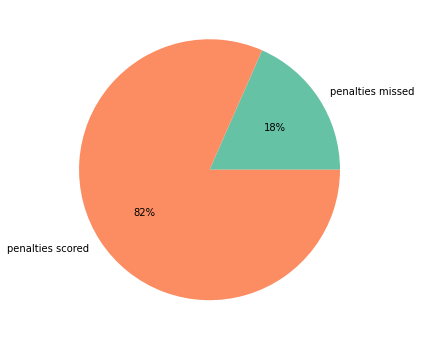

In [36]:
# pie chart for penalties missed vs scored
plt.figure(figsize=(13,6))
pl_not_scored=total_penalty-penalty_goal
data=[pl_not_scored, penalty_goal ]
labels= ['penalties missed', "penalties scored"]
colors= sns.color_palette('Set2')
plt.pie(data, labels=labels, colors= colors, autopct= '%.0f%%')
plt.show()


In [39]:
#unique positions
unique_positions= df.Position.unique()
unique_positions

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [42]:
# total number of FW players

total_FWplayers= df[df['Position']=='FW']
total_FWplayers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,mins/match,goal/match
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0


In [49]:
#number of nationality

Unique_nationalities = df.Nationality.unique()

number_of_nationality= len(Unique_nationalities)
number_of_nationality

59

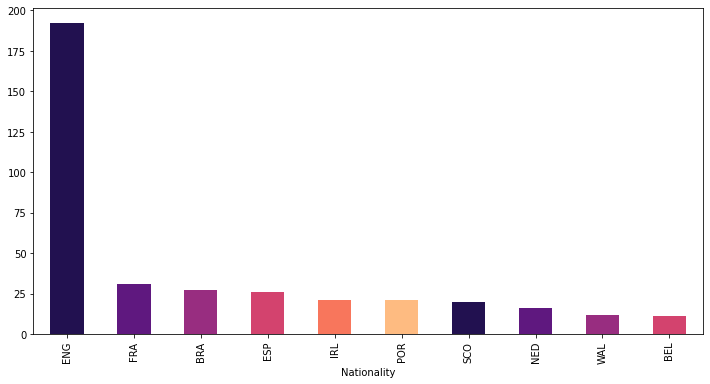

In [68]:
# bar chart of nationalities
nationalities= df.groupby('Nationality').size().sort_values(ascending=False )

nationalities.head(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette('magma'))



In [70]:
#main nationality

nationalities.index[0], nationalities[0]

('ENG', 192)

In [75]:
# 5 clubs with maximum players 
df['Club'].value_counts().nlargest(5)

West Bromwich Albion    30
Manchester United       29
Arsenal                 29
Southampton             29
Everton                 29
Name: Club, dtype: int64

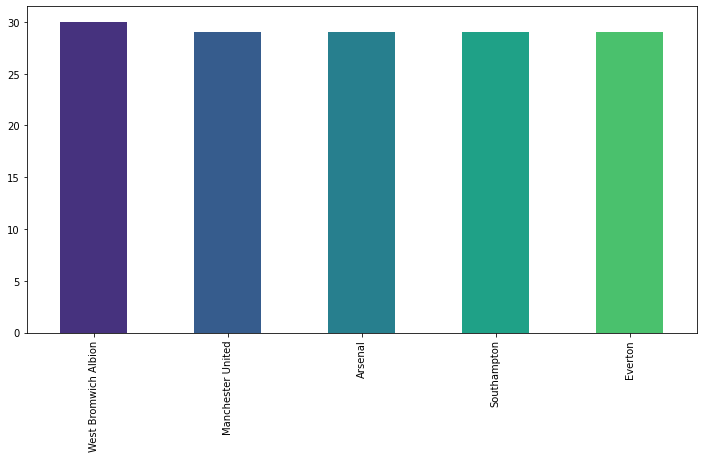

In [77]:
# clubs with maximum players chart
df['Club'].value_counts().nlargest(5).plot(kind= 'bar', figsize= (12,6), color=sns.color_palette('viridis'))

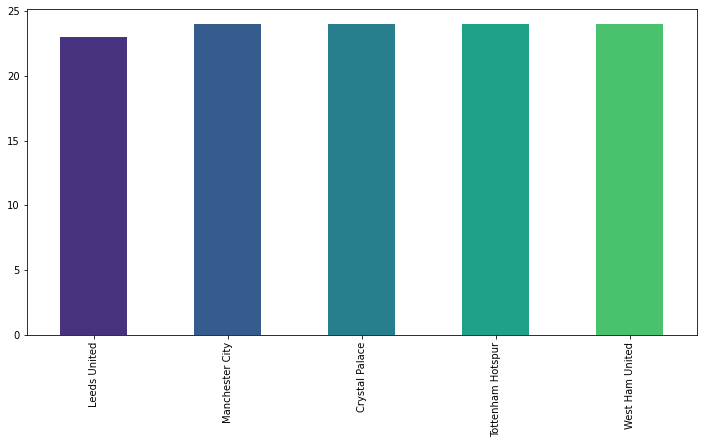

In [80]:
#  clubs with least players chart

df['Club'].value_counts().nsmallest(5).plot(kind='bar', figsize=(12,6), color=sns.color_palette('viridis'))

In [100]:
# players grouped by age

under_20= df[df['Age']<20]
age20_25= df[(20<= df['Age']) & (df['Age']<= 25)]

In [101]:
under_20

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,mins/match,goal/match
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,659,82.2,0,0,0.12,0.26,0,0,46,0
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,215,89.3,0,0,0.01,0.04,0,0,52,0
47,Eric García,Manchester City,ESP,DF,19,6,3,383,0,0,344,93.6,0,0,0.03,0.02,0,0,63,0
50,Liam Delap,Manchester City,ENG,FW,17,1,0,40,0,0,7,71.4,0,0,0.06,0.00,0,0,40,0
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,732,83.1,0,0,0.37,0.09,2,0,58,0
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,140,85.7,0,0,0.05,0.01,0,0,47,0
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,64,84.4,0,0,0.02,0.26,0,0,55,0
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,53,81.1,0,0,0.16,0.02,0,0,77,0
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,8,75.0,0,0,0.00,0.00,0,0,5,0
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,3,100.0,0,0,0.00,0.00,0,0,9,0
